In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

import pickle

C:\Users\Zachary\.conda\envs\dsi2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Zachary\.conda\envs\dsi2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('../data/raw_recording.csv')
df

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4
0,3617.0,0.0,302,4,0,0
1,3617.0,0.0,5,20,0,3
2,3612.0,0.0,6,20,1,6
3,3591.0,0.0,5,20,3,7
4,3574.0,0.0,5,20,3,7
...,...,...,...,...,...,...
11666,2415.0,1322.0,0,55,0,0
11667,2420.0,1320.0,0,55,0,0
11668,2420.0,1320.0,0,55,0,0
11669,2427.0,1320.0,0,55,0,0


In [3]:
# df.drop(columns=['time', 'start', 'end'], inplace=True)

In [4]:
for i in range(1,500):

    df[f'channel_1_{i}'] = df['channel_1'].shift(i)
    df[f'channel_2_{i}'] = df['channel_2'].shift(i)
    df[f'channel_3_{i}'] = df['channel_3'].shift(i)
    df[f'channel_4_{i}'] = df['channel_4'].shift(i)

In [5]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()

In [6]:
df.dropna(inplace=True)

In [9]:
X = df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff'])
y = list(df['x_diff'])

W = X
z = list(df['y_diff'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state = 42)

In [11]:
lr_x = Perceptron()
lr_x.fit(X_train, y_train)

lr_y = Perceptron()
lr_y.fit(W_train, z_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
lr_x.score(X_train, y_train), lr_x.score(X_test, y_test)

(0.8333930063253372, 0.7937701396348013)

In [13]:
lr_y.score(W_train, z_train), lr_y.score(W_test, z_test)

(0.7907864900346103, 0.7465091299677766)

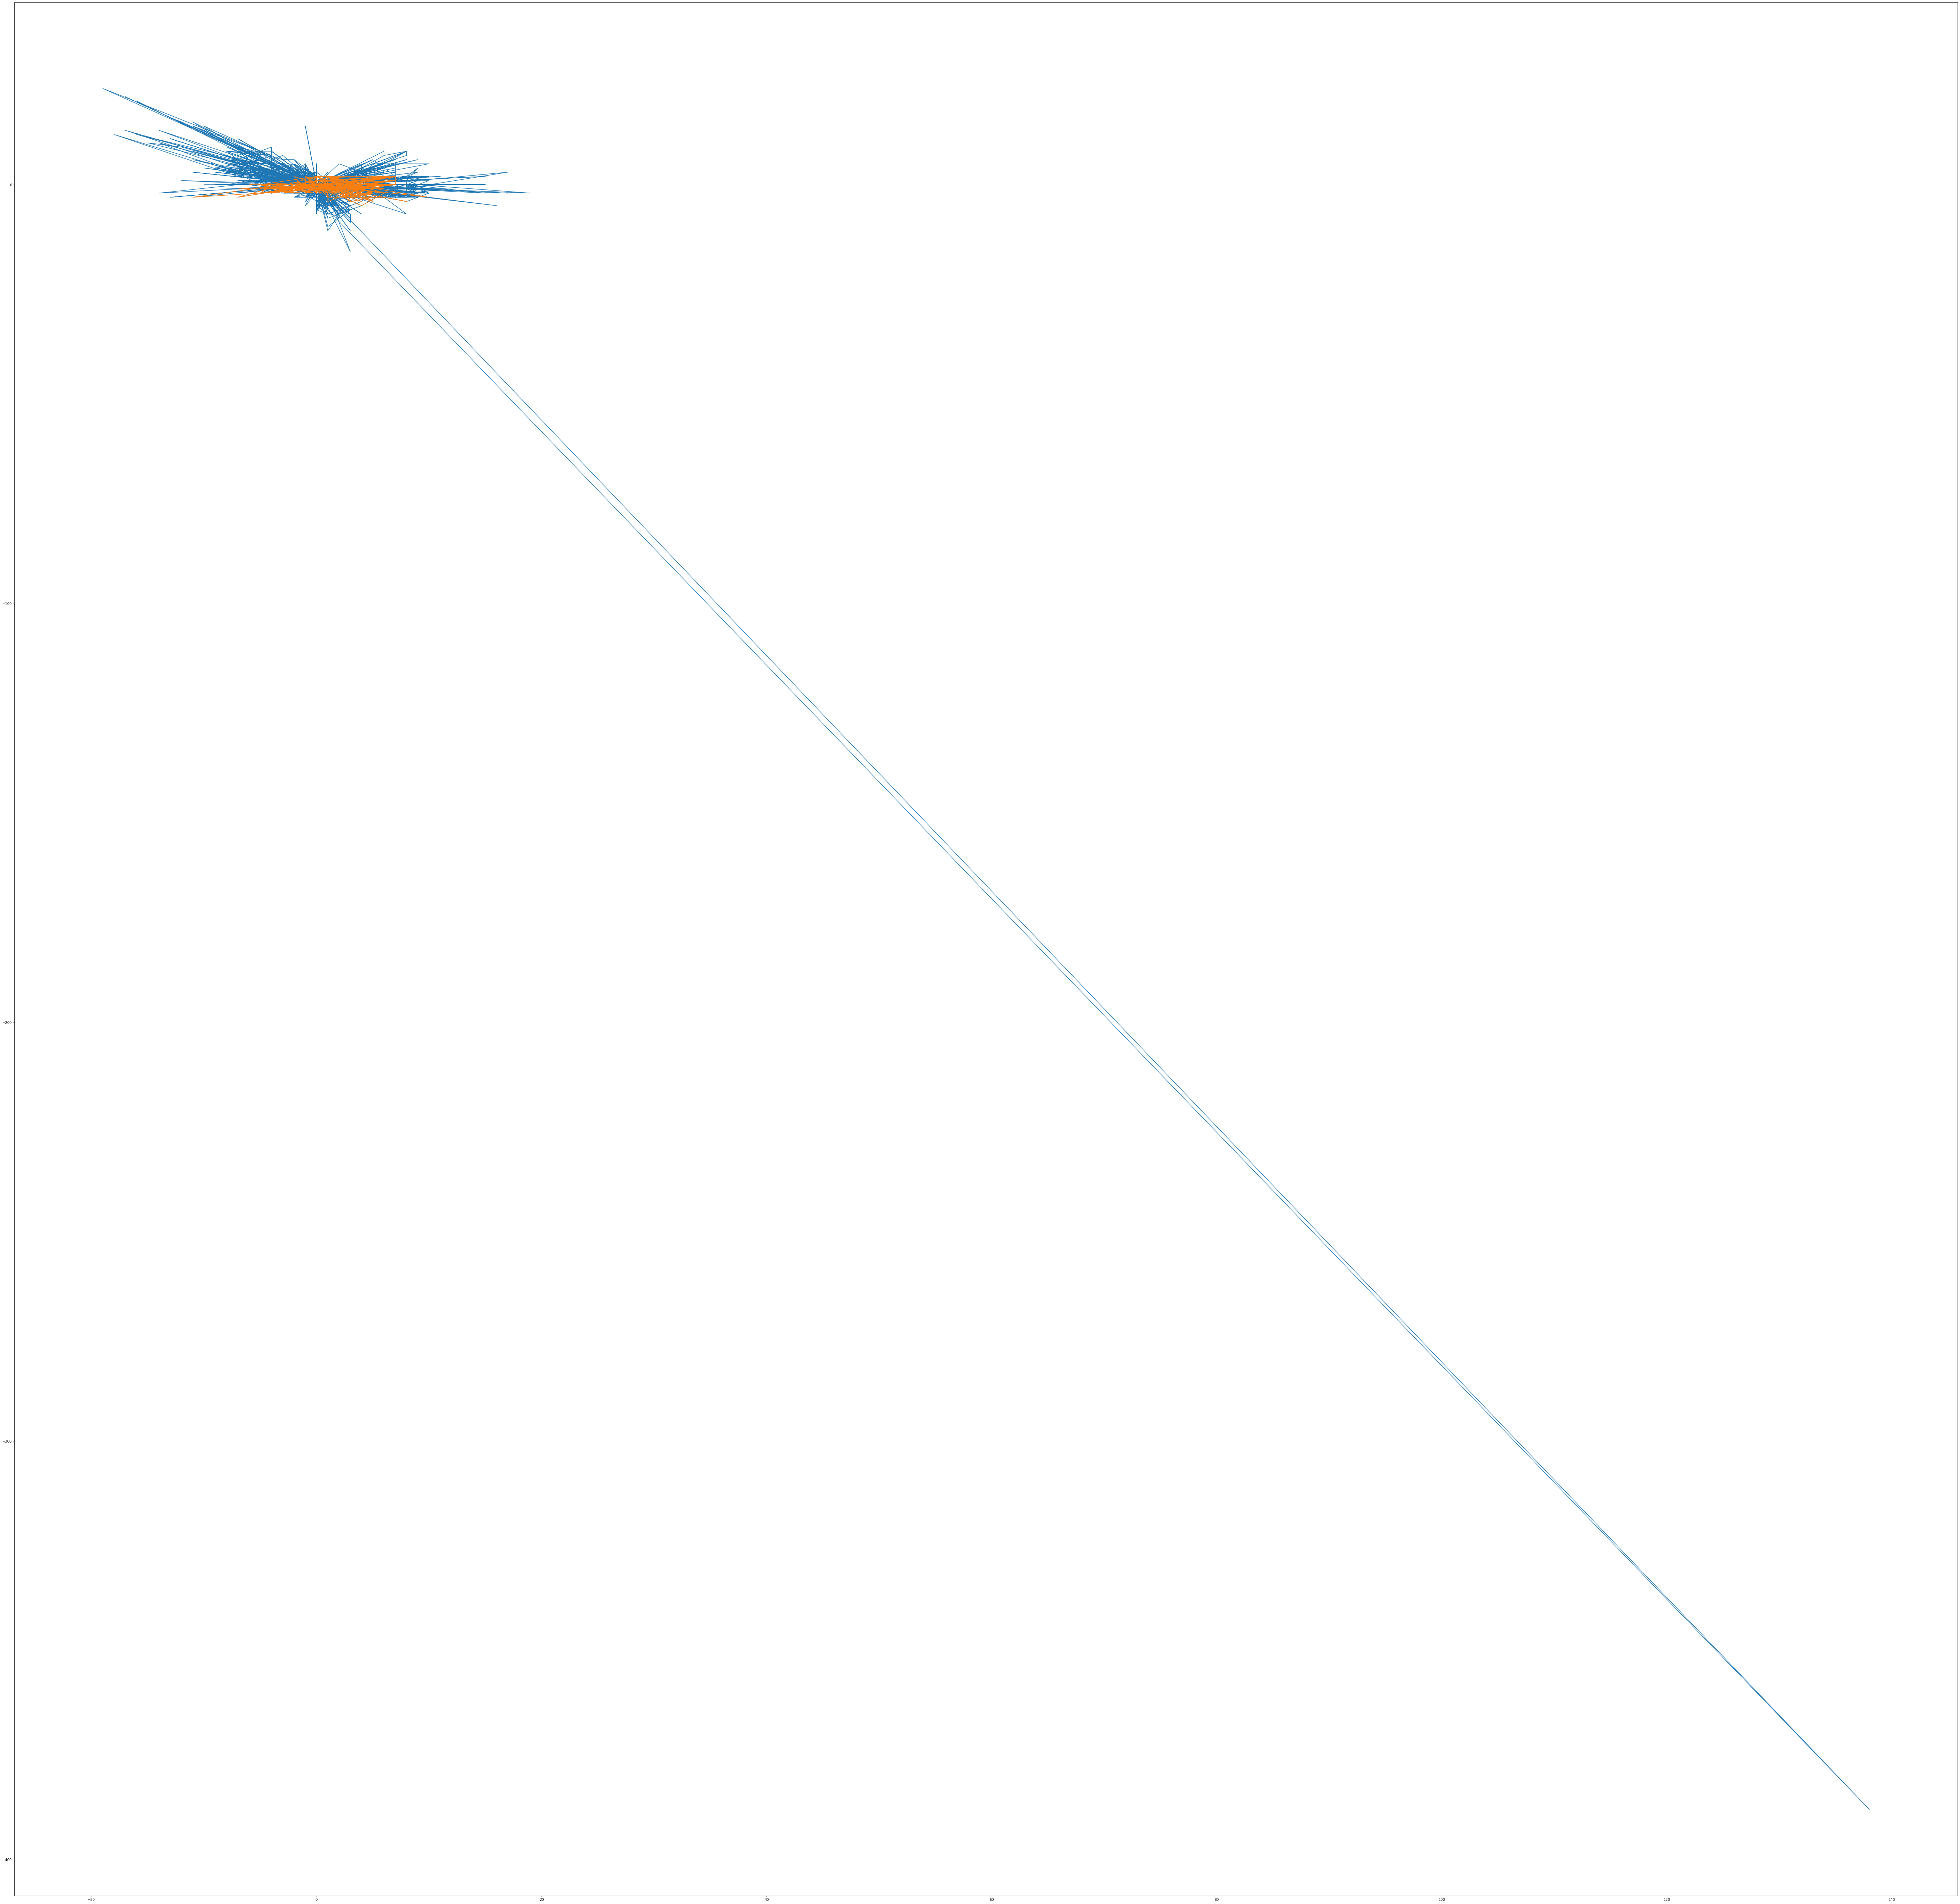

In [14]:
plt.figure(figsize=(100,100))
plt.plot(y, z);
plt.plot(lr_x.predict(X), lr_y.predict(W));


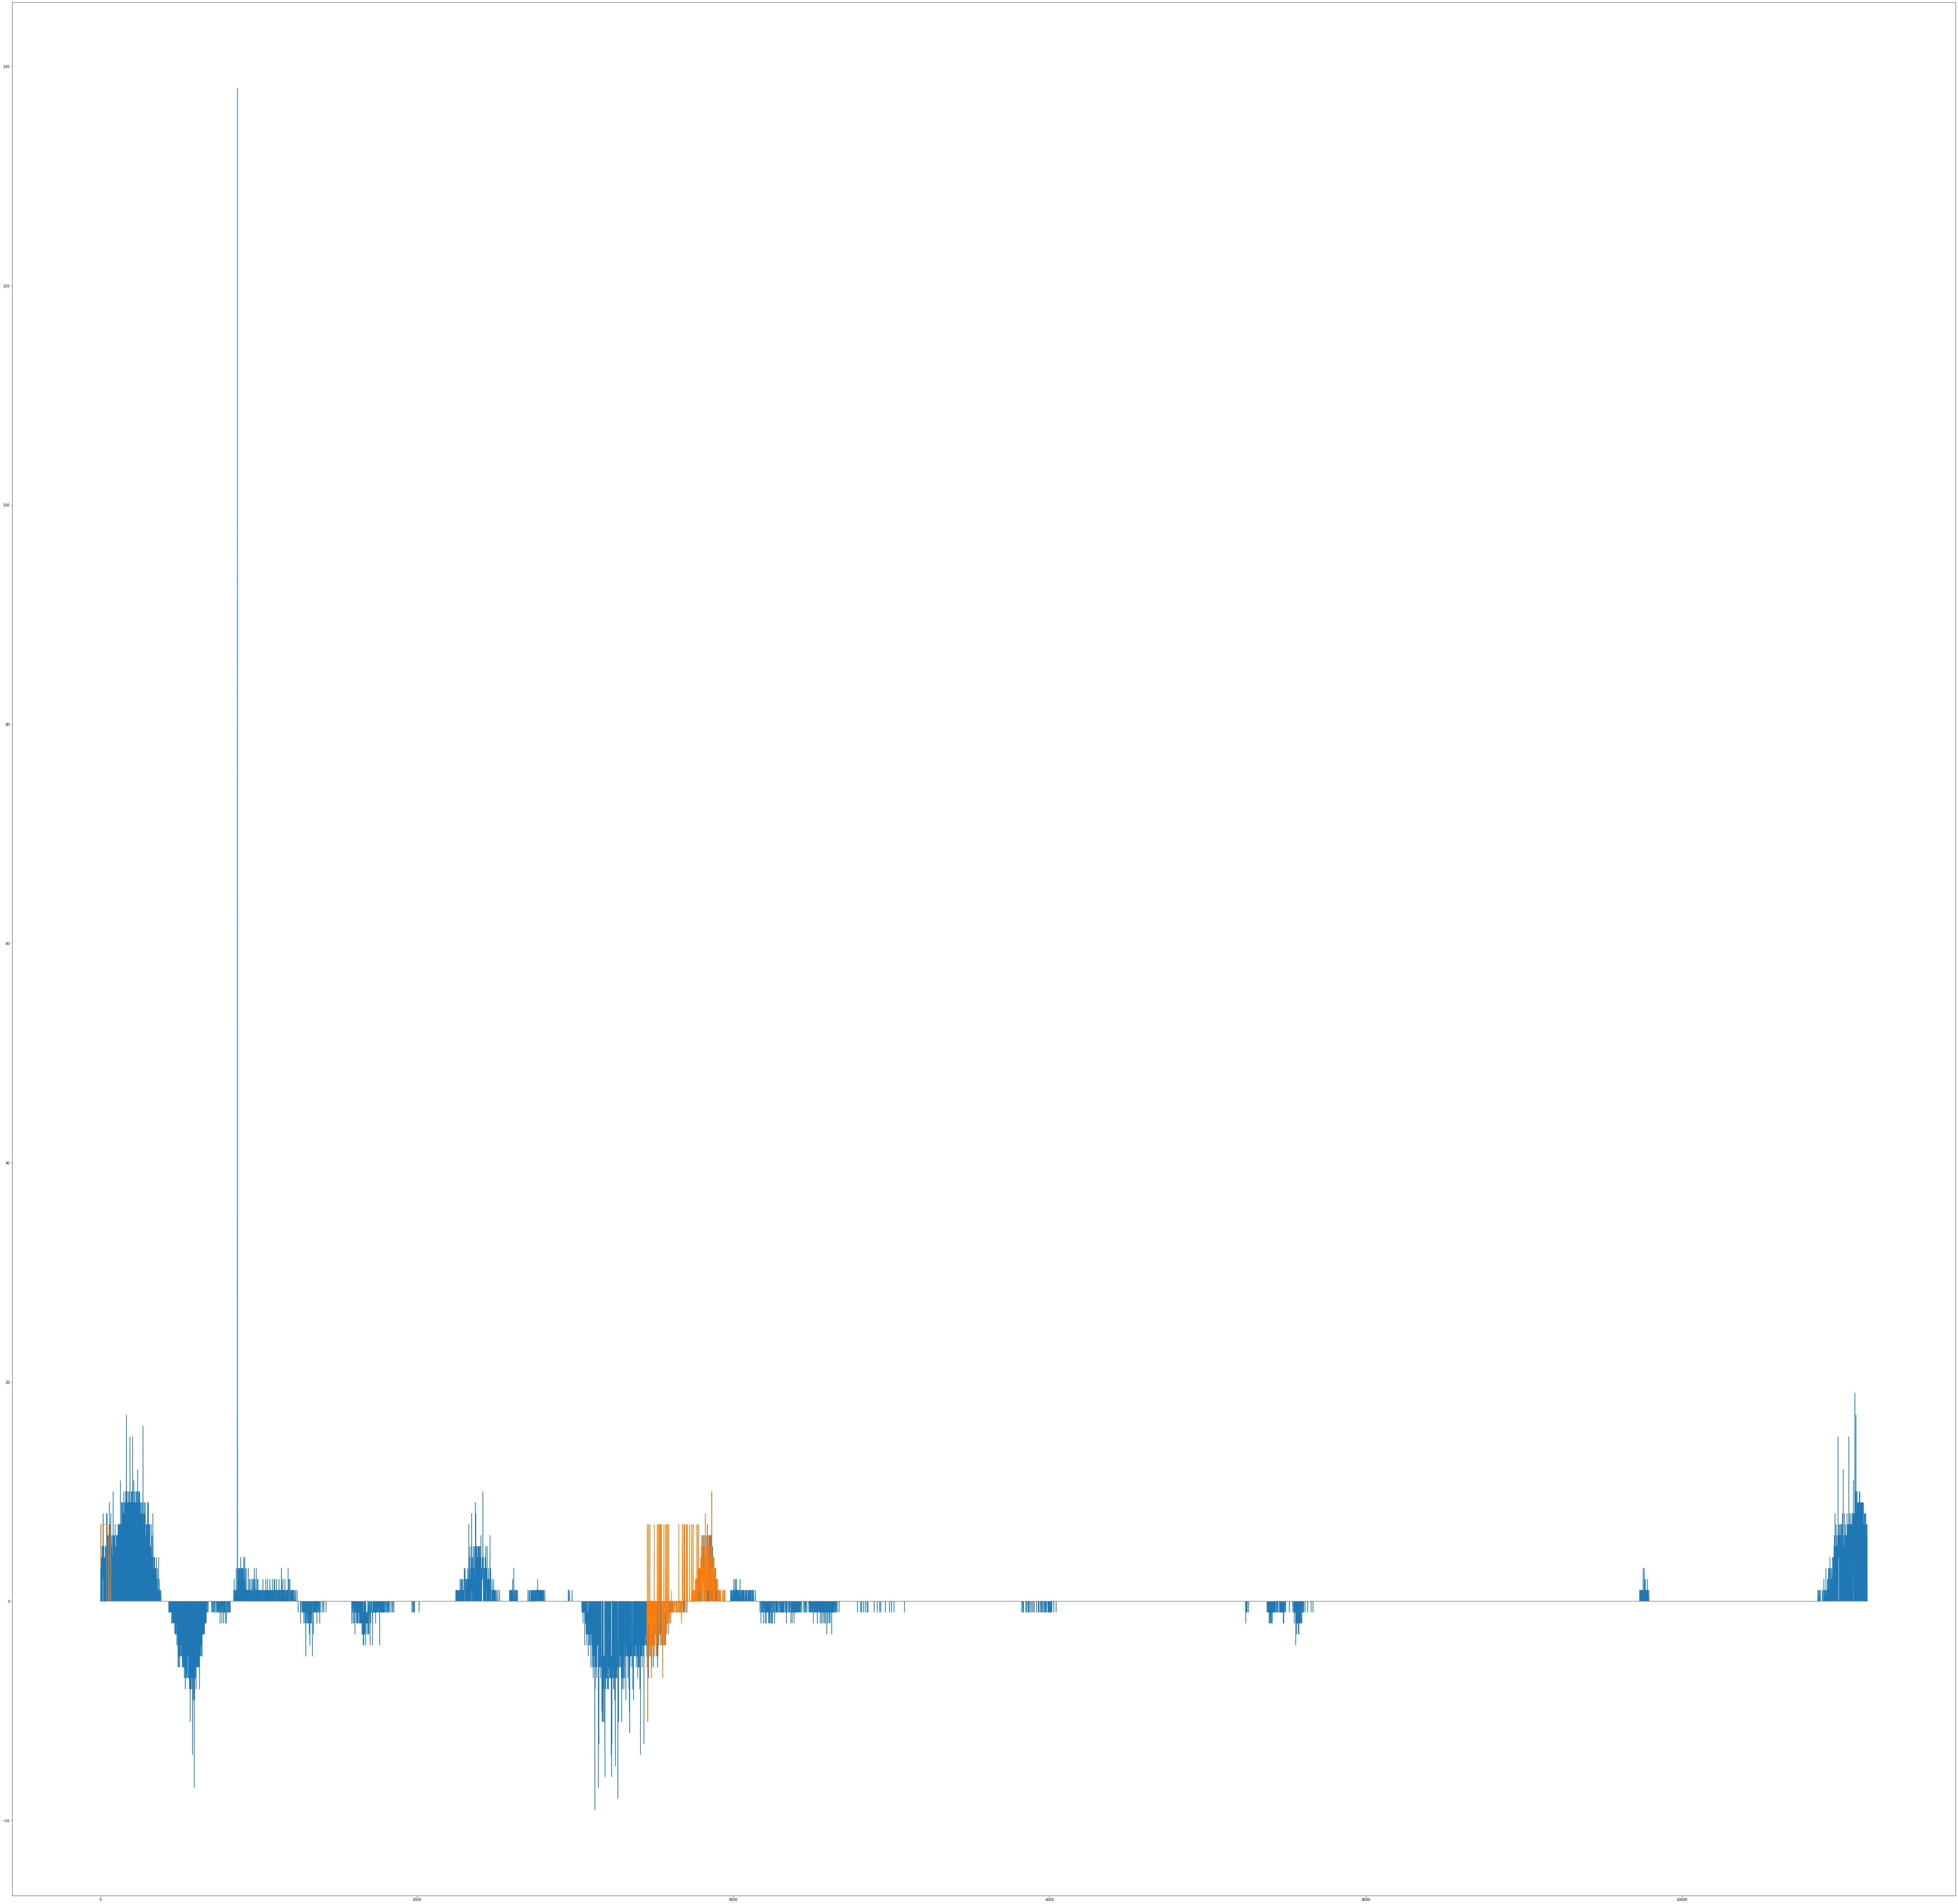

In [15]:
plt.figure(figsize=(100,100))
plt.plot(y);
plt.plot(lr_x.predict(X));


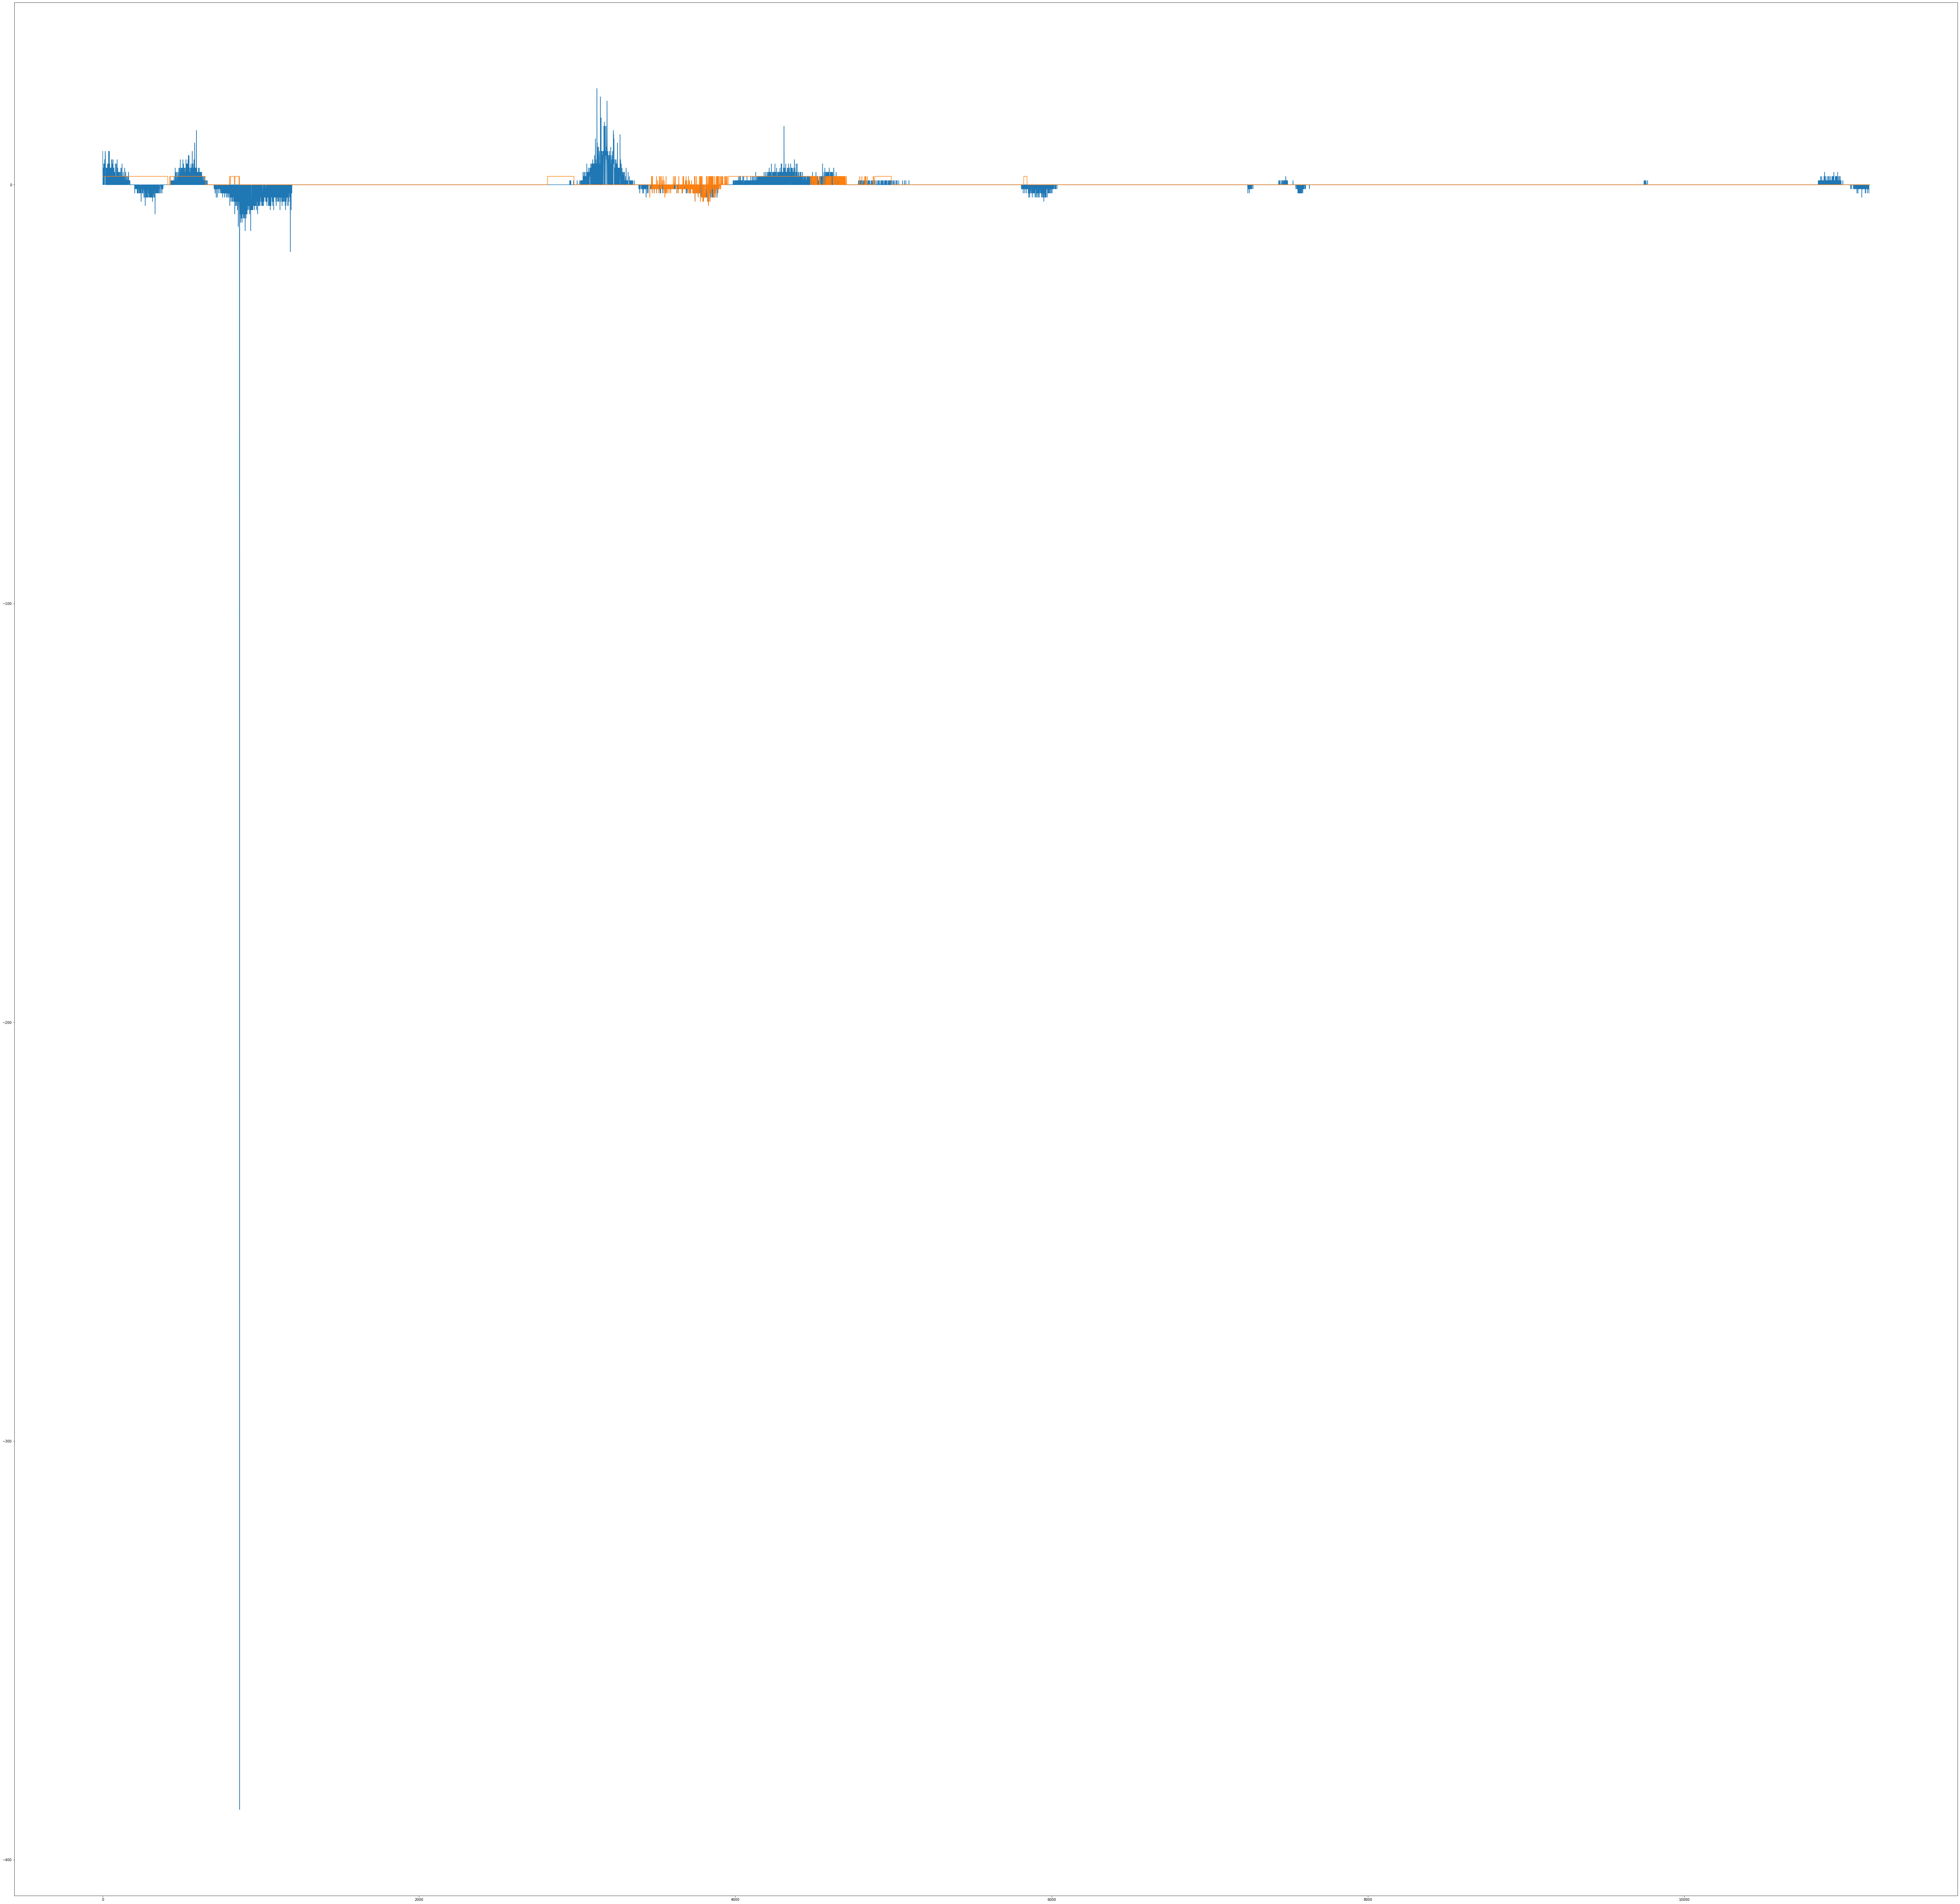

In [16]:
plt.figure(figsize=(100,100))
plt.plot(z);
plt.plot(lr_y.predict(W));


In [39]:
with open('../pickled_models/perceptron_x.pkl', 'wb') as f:
    pickle.dump(lr_x, f)


with open('../pickled_models/perceptron_y.pkl', 'wb') as f:
    pickle.dump(lr_y, f)
